In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#load csv file
df = pd.read_csv("population.csv", skiprows=4)

In [15]:
# Preview
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [16]:
# display rows and columns
df.shape

(266, 70)

In [17]:
# display all the colums of the dataset
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [18]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2021              float64
2022              float64
2023              float64
2024              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [19]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024              266
Unnamed: 69       266
Length: 70, dtype: int64

In [20]:
df.tail

<bound method NDFrame.tail of                     Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54922.0      55578.0      56320.0      57002.0   
1    

In [21]:
# Keep only necessary columns
df_2022 = df[['Country Name', '2022']].dropna()

# Convert population to numeric
df_2022['2022'] = pd.to_numeric(df_2022['2022'])

# Sort and take Top 10 countries
df_top10 = df_2022.sort_values(by='2022', ascending=False).head(10)
print(df_top10)


                   Country Name          2022
259                       World  7.989982e+09
103            IDA & IBRD total  6.795222e+09
140         Low & middle income  6.568732e+09
156               Middle income  5.851866e+09
102                   IBRD only  4.928694e+09
62   Early-demographic dividend  3.470645e+09
139         Lower middle income  3.041204e+09
249         Upper middle income  2.810662e+09
63          East Asia & Pacific  2.379648e+09
142   Late-demographic dividend  2.324072e+09


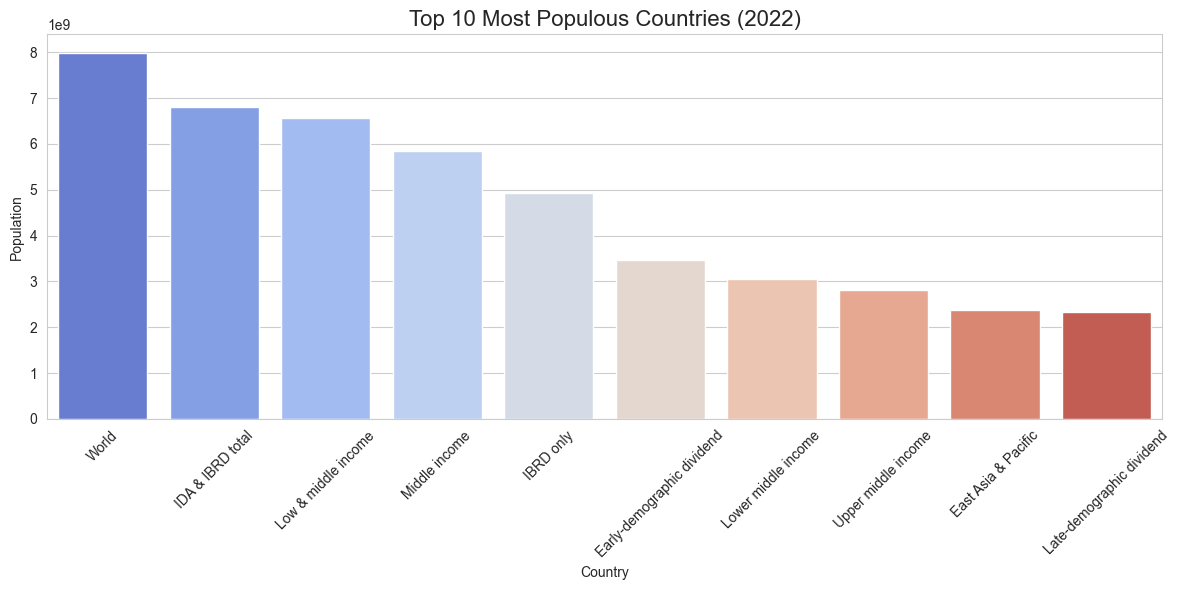

In [22]:
# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create barplot
sns.barplot(data=df_top10, x='Country Name', y='2022', hue='Country Name', palette='coolwarm', legend=False)


# Add labels and title
plt.title('Top 10 Most Populous Countries (2022)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


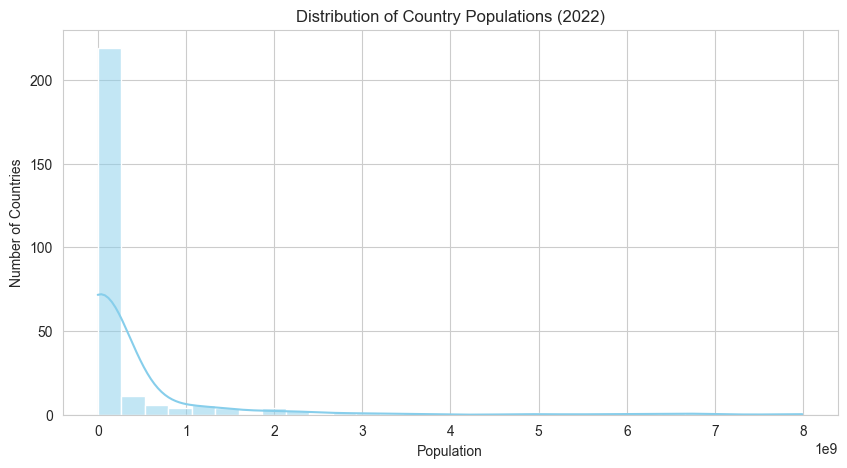

In [23]:
# Histogram of all country populations (not just top 10)
plt.figure(figsize=(10, 5))
sns.histplot(df_2022['2022'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Country Populations (2022)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.show()
